<a href="https://colab.research.google.com/github/piughosh2/liver_disease/blob/main/liver_diease_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Upload kaggle.json file:
from google.colab import files
files.upload()

In [ ]:
# configure kaggle API
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset
! kaggle datasets download -d uciml/indian-liver-patient-records

Dataset URL: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
License(s): CC0-1.0
  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 31.4MB/s]


In [ ]:
# unzip
#! unzip indian-liver-patient-records.zip
from zipfile import ZipFile
dataset ='/content/indian-liver-patient-records.zip'

with ZipFile(dataset,'r') as zip :
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#loading dataset


In [ ]:
#loading the data from csv file to pandas dataframe
liver_diease_data = pd.read_csv("/content/indian_liver_patient.csv")

In [ ]:
liver_diease_data.shape


(583, 11)

In [ ]:
liver_diease_data.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
#
liver_diease_data[liver_diease_data['Dataset']==0].head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [ ]:
liver_diease_data['Dataset'].unique()
#

array([1, 2])

In [ ]:
liver_diease_data.replace({'Dataset':{2:0}},inplace=True)

In [ ]:
liver_diease_data['Dataset'].unique()

array([1, 0])

In [ ]:
liver_diease_data.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
liver_diease_data[liver_diease_data['Dataset']==0].head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
12,64,1,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,1,0.6,0.1,183,91,53,5.5,2.3,0.70,0
17,33,1,1.6,0.5,165,15,23,7.3,3.5,0.92,0
24,63,1,0.9,0.2,194,52,45,6.0,3.9,1.85,0
28,20,1,1.1,0.5,128,20,30,3.9,1.9,0.95,0
29,84,0,0.7,0.2,188,13,21,6.0,3.2,1.10,0
32,57,1,1.0,0.3,187,19,23,5.2,2.9,1.20,0
33,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,0
36,17,0,0.7,0.2,145,18,36,7.2,3.9,1.18,0


In [ ]:
#target column is dataset
#couting the number of missing values in the dataset
liver_diease_data.isnull().sum()


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
liver_diease_data.dropna(inplace=True)

In [ ]:
liver_diease_data.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [ ]:
liver_diease_data.shape

(579, 11)

In [ ]:
liver_diease_data.duplicated().sum()

np.int64(13)

In [ ]:
liver_diease_data.drop_duplicates(inplace=True)

In [ ]:
liver_diease_data.shape

(566, 11)

In [ ]:
liver_diease_data['Dataset'].value_counts()

,count
Dataset,
1,404
0,162


In [ ]:
liver_diease_data.describe(include=['object'])

,Gender
count,566
unique,2
top,Male
freq,428


In [ ]:
liver_diease_data['Gender'].value_counts()

,count
Gender,
Male,428
Female,138


<Axes: xlabel='Gender', ylabel='count'>

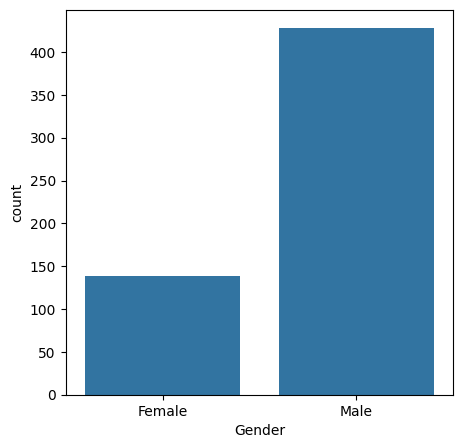

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=liver_diease_data)

In [ ]:
#convert gender to numerical
liver_diease_data['Gender']=liver_diease_data['Gender'].map({'Male':1,'Female':0})

In [ ]:
liver_diease_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
!pip install -q imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

X = liver_diease_data.drop('Dataset',axis=1)
y = liver_diease_data['Dataset']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

,count
Dataset,
1,404
2,404


In [ ]:
x=liver_diease_data.drop('Dataset',axis=1)
y=liver_diease_data['Dataset']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y)

In [ ]:
# =============================
# 4. Fix Class Imbalance (SMOTE)
# =============================
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(566, 10) (646, 10) (162, 10)


In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,model.predict(X_train))
print("accuracy score on the training data : " ,training_data_accuracy)

accuracy score on the training data :  0.7523219814241486


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,model.predict(X_test))
print("accuracy score on the test data : " ,test_data_accuracy)

accuracy score on the test data :  0.7407407407407407


In [ ]:
print(confusion_matrix(y_test,model.predict(X_test)))
print(classification_report(y_test,model.predict(X_test)))

[[49 27]
 [15 71]]
              precision    recall  f1-score   support

           1       0.77      0.64      0.70        76
           2       0.72      0.83      0.77        86

    accuracy                           0.74       162
   macro avg       0.75      0.74      0.74       162
weighted avg       0.74      0.74      0.74       162



In [ ]:
liver_diease_data_liver=liver_diease_data[liver_diease_data['Dataset']==0]
liver_diease_data_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [ ]:
! pip install -q imbalanced-learn # install SMOTE

In [ ]:
#prepare the data
from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score
#import pandas as pd


In [ ]:
# split x and y
x= liver_diease_data.drop('Dataset',axis=1)
y=liver_diease_data['Dataset']

In [ ]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
y_train_resampled.value_counts() # check balance

,count
Dataset,
0,323
1,323


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
# train and test split

In [ ]:
# apply standard scalling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [ ]:
# train logistic model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000)

In [ ]:
# train accuracy

y_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train data:", train_accuracy)


Accuracy on train data: 0.28761061946902655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# test accuracy

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.2894736842105263


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [114, 452]

In [ ]:
# classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
import pickle

In [ ]:
filename='liver_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading to saved model

loaded_model = pickle.load(open('/content/liver_model.pkl','rb'))

In [ ]:
#prediction = loaded_model.predict(X_new)

prediction = loaded_model.predict(np.array([liver_diease_data.iloc[11,:-1]]))
print(prediction)
if (prediction[0]==1):
     print("  liver diease")
else:
      print (" no liver diease")

[1]
  liver diease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Provide test input values
# Gender, Age, Total_B, Direct_B, AlkPhos, SGPT, SGOT, Total_Prot, Albumin, AG_Ratio
sample = np.array([[8,	17,	1,	0.9,	0.3,	202,	22,	19,	7.4,	4.1,	1.20		]])
sample = sample[:, :-1]
# Make prediction
pred = loaded_model.predict(sample)

# Output result
print("Raw Output:", pred)

if pred[0] == 1:
    print("Final Result: Liver Disease Detected")
else:
    print("Final Result: No Liver Disease")

Raw Output: [1]
Final Result: Liver Disease Detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DEPLOY USING GRADIO

In [45]:
!pip install gradio


In [46]:
# loaded the model
import pickle

# Example: save and load model
with open("liver_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'liver_model.pkl'

In [47]:
def predict_liver(age, gender, tb, db, alkphos, sgot, sgpt, tp, alb, agr):
    import numpy as np

    gender = 1 if gender == "Male" else 0

    input_data = np.array([[age, gender, tb, db, alkphos, sgot, sgpt, tp, alb, agr]])

    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)

    return "Liver Disease" if prediction[0] == 1 else "No Liver Disease"


In [48]:
# create gradio interface

import gradio as gr

app = gr.Interface(
    fn=predict_liver,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Total Bilirubin"),
        gr.Number(label="Direct Bilirubin"),
        gr.Number(label="Alkaline Phosphotase"),
        gr.Number(label="SGOT"),
        gr.Number(label="SGPT"),
        gr.Number(label="Total Proteins"),
        gr.Number(label="Albumin"),
        gr.Number(label="A/G Ratio")
    ],
    outputs="text",
    title="Liver Disease Prediction",
    description="Enter patient values to predict liver disease"
)

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea788f9c7825e56f17.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
